In [2]:
%run forward_dynamics_example.ipynb

In [3]:
tau_uu = uv_body.thruster_input2generalized_Forces()
tau_f_Tc = Function('tau_io', [Tc, thru_u], [tau_uu])

# tau_f_Tc.size()

Ftx = F(xS0,tau_uu,dt,v_c)
Ftx_func = Function('Vnext_thru',[xS0, Tc, thru_u, dt, v_c],[Ftx])

F_alloc = Function('Vnext_Alloc', [xS0, thru_u, dt, v_c], [Ftx_func(xS0, ps.thrust_config, thru_u, dt, v_c)])

In [3]:
# c , cpp or matlab code generation for forward dynamics
# F_alloc.generate("Vnext.c")
# os.system(f"gcc -fPIC -shared Vnext.c -o libVnext.so")

In [4]:
thruster_effort = np.linalg.pinv(ps.thrust_config)@np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

v_b0 = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
p0 = np.array([0.0, 0.0, 0.0])
q0 = np.array([1, 0, 0 ,0])
x0 = vertcat(p0, q0, v_b0)
dt = T/N
flow_vel = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

F_alloc(x0,thruster_effort,dt, flow_vel)

DM([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Loop Simulation with step input

In [5]:
sim = F_alloc.mapaccum(N)
# res = sim(x0, forces)
# res

[0.1, 0, 0, 0, 0, 0]


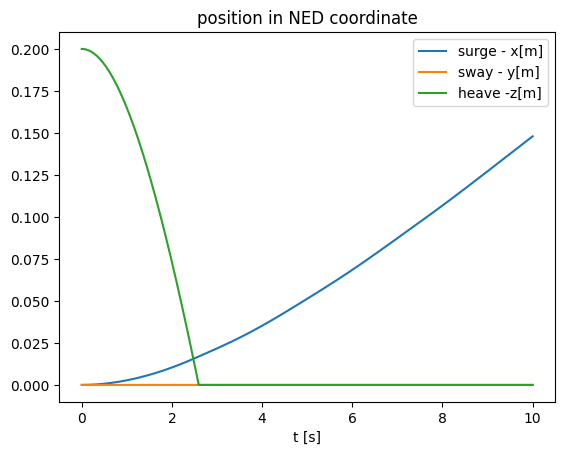

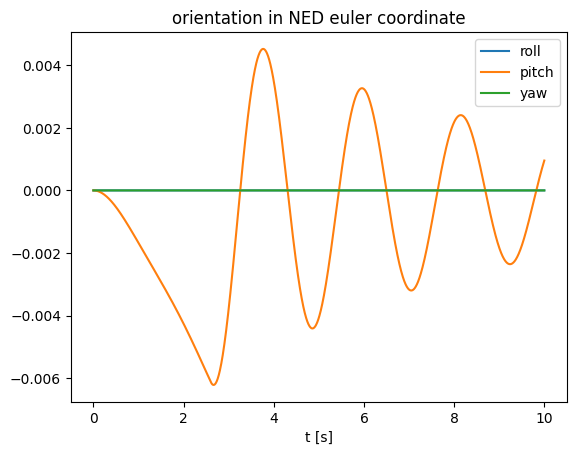

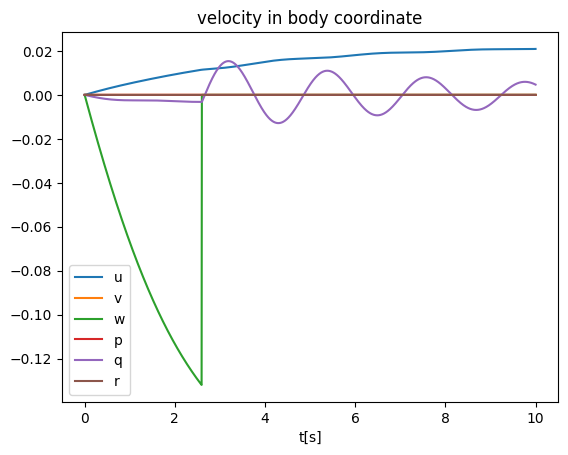

In [7]:
# SIMULATING vehicle on water surface
x0 = np.array([0.0, 0.0, 0.2, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0]) #x y z w xq yq zq u v w p q r
# thru_u.size()
thruster_effort = np.linalg.pinv(ps.thrust_config)@np.array([0.1, 0.0, 0.0, 0.0, 0.0, 0.0])

print(tau_f_Tc(ps.thrust_config, thruster_effort))
# forces
# u0 = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
res = sim(x0, thruster_effort,dt, flow_vel)
res.T
# T = 200 # time horizon
# N = 1600 # number of control intervals
t = np.linspace(0, T, N+1)

# Create a figure and plot the data
plt.figure()
plt.plot(t, np.concatenate((np.array(x0).reshape((13,1)), res.toarray()), axis=1)[0:3,:].T)
plt.legend(['surge - x[m]', 'sway - y[m]', 'heave -z[m]'])
plt.title("position in NED coordinate")
plt.xlabel('t [s]')

plt.figure()
vfunc = np.vectorize(euler_from_quaternion, signature='(n)->(k)')
rpy_array = vfunc(np.concatenate((np.array(x0).reshape((13,1)), res.toarray()), axis=1)[3:7,:].T)
plt.plot(t, rpy_array)
plt.legend(['roll', 'pitch', 'yaw'])
plt.title("orientation in NED euler coordinate")
plt.xlabel('t [s]')

plt.figure()
plt.plot(t, np.concatenate((np.array(x0).reshape((13,1)), res.toarray()), axis=1)[7::,:].T)
plt.legend(['u', 'v', 'w', 'p', 'q', 'r'])
plt.xlabel('t[s]')
plt.title("velocity in body coordinate")
plt.show()

